# Cross Validation

In this notebook, I validate choices using cross validation.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib

import pymc3 as pm
import theano.tensor as tt
import exoplanet as xo

import aviary as av
import astropy.modeling as apm

from tqdm import trange
import pickle

from cv_routines import *

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [3]:
def RMS(ypred, yobs):
    return np.sqrt(sum((ypred - yobs)**2) / float(len(ypred)))

def MAD(ypred, yobs):
    return np.median(abs(ypred - yobs))

Variables to be optimized:

In [4]:
filename = "../data/CV_gp_model.pkl"

In [5]:
# young_limit = .7  # .1 is worse.
# old_limit = 20.
# hot_limit = 1.
# dp, dc = .05, .05
# cluster_old_err = .05  # The relative prot uncertainty on Ruprecht 147 and NGC6819
# kinerr = .05 # The relative prot uncertainty on kinematic grid periods. .1 was worse. .03 also worse, but better MAD (bad at old ages).
# abs_kinerr = 2.
# sun_err = .01  # The absolute prot uncertainty on the Sun's rotation period.

In [6]:
# x, age, prot, prot_err, ID, akin, cluster_x, cluster_prot, cluster_age = assemble_data(young_limit, old_limit, hot_limit, dp, dc, cluster_old_err, abs_kinerr, sun_err)

In [7]:
# plt.figure(figsize=(8, 5), dpi=100)
# plt.errorbar(x, prot, yerr=prot_err, fmt=".", color="k", alpha=.5, ms=1, zorder=0)
# plt.scatter(x[ID==0], prot[ID==0], c=age[ID==0], s=30, edgecolor="k", cmap="plasma_r", zorder=2)
# plt.scatter(x[ID==1], prot[ID==1], c=age[ID==1], s=10, cmap="plasma_r", zorder=1)
# plt.xlabel("$$\mathrm{G_{BP}-G_{RP}}$$")
# plt.ylabel("$\mathrm{ln(P_{rot}/days)}$")
# plt.colorbar(label="$\mathrm{ln(Age/Gyr)}$")
# plt.yscale("log")

In [8]:
# plt.scatter(akin.bprp_dered, akin.Prot, c=akin.kin_age_lucy, s=10, cmap="plasma_r")
# plt.colorbar();

First, let's see what the age residuals look like when you don't leave any stars out. Fit the model to all the data.

In [9]:
# young_limit = .7  # .1 is worse.
# old_limit = 20.
# hot_limit = 1.
# dp, dc = .05, .05
# cluster_old_err = .05  # The relative prot uncertainty on Ruprecht 147 and NGC6819
# # kinerrs = np.linspace(.01, .1, 1)  # The relative prot uncertainty on kinematic grid periods. .1 was worse. .03 also worse, but better MAD (bad at old ages).
# abs_kinerrs = np.linspace(.5, 1.5, 5)  # The absolute prot uncertainty """"""
# sun_err = .01  # The absolute prot uncertainty on the Sun's rotation period.
# abs_kinerrs = 1. 

Model variables: slope_low, slope_high, log_smooth, teff_break, log_period_break_m, log_period_break_b, log_s2, log_amp, log_ell

In [10]:
# rms, mad = [np.zeros(len(abs_kinerrs)) for i in range(2)]
# results, mus = [], []
# for j, kinerr in enumerate(abs_kinerrs):
#     print(j+1, "of", len(kinerrs), "kinerr = ", kinerr)
#     x, age, prot, prot_err, ID, akin, cluster_x, cluster_prot, cluster_age = assemble_data(young_limit, old_limit, hot_limit, dp, dc, cluster_old_err, kinerr, sun_err)
    
#     # Retrain the model
#     map_soln = av.fit_gp(x, age, prot, prot_err, filename)
    
#     mu, sig, mu_fit = get_stellar_ages(x, prot, prot_err, filename)
#     rms[j] = RMS(age, mu)
#     mad[j] = MAD(age, mu)
#     results.append(map_soln)
#     mus.append(mu)

In [11]:
# rms  # [0.81800025]

In [12]:
# log_s2 = np.array([float(results[k]["log_s2"]) for k in range(len(results))])
# log_s2

In [13]:
# fig = plt.figure(figsize=(10, 8))
# ax0 = fig.add_subplot(211)
# ax0.plot(abs_kinerrs, np.log(rms), "C0o")
# ax0.plot(abs_kinerrs, np.log(rms), "C0-", label="RMS")
# ax0.plot(abs_kinerrs, np.log(mad), "C1o")
# ax0.plot(abs_kinerrs, np.log(mad), "C1-", label="MAD")
# ax0.set_ylabel("RMS/MAD")
# ax0.legend()

# ax1 = fig.add_subplot(212, sharex=ax0)
# ax1.plot(abs_kinerrs, log_s2, "C0o")
# ax1.plot(abs_kinerrs, log_s2, "C0-")
# ax1.set_xticklabels([])
# ax1.set_xlabel("Variable")
# ax1.set_ylabel("Extra jitter")
# plt.subplots_adjust(hspace=0.)

retrain

In [14]:
# x, age, prot, prot_err, ID, akin, cluster_x, cluster_prot, cluster_age = assemble_data(young_limit, old_limit, hot_limit, dp, dc, cluster_old_err, 1.625, sun_err)
    
# # Retrain the model
# map_soln = av.fit_gp(x, age, prot, prot_err, filename)
    
# mu, sig, mu_fit = get_stellar_ages(x, prot, prot_err, filename)
i = 1

In [15]:
# fig = plt.figure(figsize=(10, 7))
# # plt.errorbar(age, mu-age, yerr=sig, fmt=".")
# # plt.axhline(0, color="k", lw=.5)
# plt.errorbar(age, mus[i], yerr=sig, fmt="k.", alpha=.7, zorder=0)
# plt.scatter(age, mus[i], c=x)
# xs = np.linspace(min(age), max(age), 100)
# plt.plot(xs, xs)
# plt.colorbar(label="Gaia Color")
# plt.xlabel("Age [Gyr]")
# plt.ylabel("Gyro age [Gyr]");

In [16]:
# fig = plt.figure(figsize=(16, 6), dpi=200)
# ax0 = fig.add_subplot(121)
# ax0.scatter(x, prot, c=age, s=30, cmap="plasma_r")
# ax0.set_yscale("log")
# ax0.set_xlabel("Color")
# ax0.set_ylabel("Prot")

# ax1 = fig.add_subplot(122, sharey=ax0)
# ax1.scatter(x, prot, c=mus[i], s=30, cmap="plasma_r")
# # ax1.set_yticklabels([])
# # ax1.set_yscale("log")
# ax1.set_xlabel("Color")

# plt.subplots_adjust(wspace=0.)

In [17]:
# make_plot(akin, x, age, prot, prot_err, cluster_x, cluster_prot, cluster_age, filename)

# Now using proper cross validation.

Pull out some data for cross validation and loop over cross validation batches.

In [18]:
# def train_val(x, y, z, yerr, ID, ind_batch):
    
#     # Divide data into train and validate
#     bools = np.ones(len(x), dtype="bool")
#     bools[ind_batch] = np.zeros(len(bools[ind_batch]), dtype="bool")*1
#     xval, yval, yerrval, zval, IDval = x[ind_batch], y[ind_batch], \
#         yerr[ind_batch], z[ind_batch], ID[ind_batch]
#     xtrain, ytrain, yerrtrain, ztrain, IDtrain = x[bools], y[bools], yerr[bools], z[bools], ID[bools]
#     return xtrain, xval, ytrain, yval, ztrain, zval, yerrtrain, yerrval, IDtrain, IDval

# def cross_validate(x, age, prot, prot_err, ID, filename, nbatches=10, nstars=10, seed=42):
    
#     # Randomly select indices for nbatches of data for training and validation.
#     np.random.seed(seed)
#     ind_batches = [np.random.choice(np.arange(len(x)), nstars) for i in range(nbatches)]
    
#     true_ages, pred_ages, sigmas, ids, results = [], [], [], [], []
#     for i in range(nbatches):  # For each cross validation test
    
#         # Split data into train and validate.
#         x_train, x_val, prot_train, prot_val, age_train, age_val, prot_err_train, \
#             prot_err_val, ID_train, ID_val = train_val(x, prot, age, prot_err, ID, ind_batches[i])

#         # Fit the GP gyro model to training set and get ages for validation set
#         map_soln = av.fit_gp(x_train, age_train, prot_train, prot_err_train, filename)
#         mu, sig, mu_fit = get_stellar_ages(x_val, prot_val, prot_err_val, filename)

#         # Save the results
#         true_ages.append(age_val)
#         pred_ages.append(mu)
#         sigmas.append(sig)
#         ids.append(ID_val)
#         results.append(map_soln)
        
#     # Combine results from all batches.
#     trues = np.array([i for j in true_ages for i in j])
#     preds = np.array([i for j in pred_ages for i in j])
#     sigs = np.array([i for j in sigmas for i in j])
#     idss = np.array([i for j in ids for i in j])
#     return trues, preds, sigs, idss, results

Variables to test.

In [33]:
young_limit = .7  # .1 is worse.
old_limit = 20.
hot_limit = 1.
dp, dc = .05, .05
cluster_old_err = .05  # The relative prot uncertainty on Ruprecht 147 and NGC6819
abs_kinerrs = np.linspace(.5, 5, 5)  # The absolute prot uncertainty """"""
sun_err = .01  # The absolute prot uncertainty on the Sun's rotation period.

In [34]:
variables = abs_kinerrs
nvar = len(variables)

In [35]:
# The number of cross validation batches
nbatches = 10

In [36]:
filename = "../data/CV_gp_model.pkl"

rms, mad = [np.zeros(nvar) for i in range(2)]
results, all_true_ages, all_pred_ages, all_sigmas = [], [], [], []
for j, var in enumerate(variables):
    print(j+1, "of", len(variables), "kinerr = ", var)
    
    # Create data arrays using variables
    x, age, prot, prot_err, ID, akin, cluster_x, cluster_prot, cluster_age = assemble_data(young_limit, old_limit, hot_limit, dp, dc, cluster_old_err, var, sun_err)
    
    # Cross validate.
    true_ages_cv, pred_ages_cv, sigmas_cv, ids_cv, results_cv = cross_validate(x, age, prot, prot_err, ID, filename, nbatches=nbatches)
    
    rms[j] = RMS(true_ages_cv, pred_ages_cv)
    mad[j] = MAD(true_ages_cv, pred_ages_cv)
    results.append(results_cv)
    all_true_ages.append(true_ages_cv)
    all_pred_ages.append(pred_ages_cv)
    all_sigmas.append(sigmas_cv)

1 of 5 kinerr =  0.5


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.3165705974934 -> -1109.2780555002194
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.2780555002194 -> -1108.610273730529
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.610273730529 -> -1106.6156784534987
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.6156784534987 -> -1104.7624277585548
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.7624277585548 -> 227.1610185103073
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 227.1610185103073 -> 236.3500115452998
100%|██████████| 10/10 [00:00<00:00, 13.79it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.2742567982575 -> -1109.22745605651
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.22745605651 -> -1108.5845955904813
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.5845955904813 -> -1106.5914351962874
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.5914351962874 -> -1104.765188104235
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.765188104235 -> 222.79342311697977
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Desired error not necessarily achieved due to precision loss.
logp: 222.79342311697977 -> 232.28207853765966
100%|██████████| 10/10 [00:00<00:00, 13.52it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.2373801840265 -> -1109.194988768211
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.194988768211 -> -1108.556121147494
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.556121147494 -> -1106.5759186412968
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.5759186412968 -> -1104.7231730891297
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.7231730891297 -> 227.01162407428777
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 227.01162407428777 -> 236.80815565917607
100%|██████████| 10/10 [00:00<00:00, 13.45it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.1523802353734 -> -1109.13458299917
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.13458299917 -> -1108.486577287364
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.486577287364 -> -1106.4596520358075
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.4596520358075 -> -1104.6190739696594
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.6190739696594 -> 240.8320792905364
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 240.8320792905364 -> 250.63907152563704
100%|██████████| 10/10 [00:00<00:00, 13.45it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.3086132487945 -> -1109.269145897139
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.269145897139 -> -1108.605709233069
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.605709233069 -> -1106.6201278156325
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.6201278156325 -> -1104.7779065228863
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.7779065228863 -> 224.548089925045
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 224.548089925045 -> 234.04187459461272
100%|██████████| 10/10 [00:00<00:00, 13.60it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.283484578898 -> -1109.2536837362934
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.2536837362934 -> -1108.5996131491052
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.5996131491052 -> -1106.6049772547349
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.6049772547349 -> -1104.7697245490156
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.7697245490156 -> 224.5818024959885
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 224.5818024959885 -> 233.91130648540735
100%|██████████| 10/10 [00:00<00:00, 13.60it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.1758376197497 -> -1109.121140929819
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.121140929819 -> -1108.4978145841749
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.4978145841749 -> -1106.4819587248323
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.4819587248323 -> -1104.662741528249
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.662741528249 -> 227.10612758773522
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 227.10612758773522 -> 236.01246467772168
100%|██████████| 10/10 [00:00<00:00, 13.58it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.2073151533696 -> -1109.1728918163103
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.1728918163103 -> -1108.544792829459
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.544792829459 -> -1106.532373995503
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.532373995503 -> -1104.7133461726696
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.7133461726696 -> 232.49049904765914
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 232.49049904765914 -> 242.25207758300022
100%|██████████| 10/10 [00:00<00:00, 13.64it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.2838806748325 -> -1109.2722252886526
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.2722252886526 -> -1108.6287727993158
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.6287727993158 -> -1106.6335929655252
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.6335929655252 -> -1104.8088554501546
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.8088554501546 -> 225.00354434445177
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Desired error not necessarily achieved due to precision loss.
logp: 225.00354434445177 -> 234.41518206900963
100%|██████████| 10/10 [00:00<00:00, 13.93it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.13732992291 -> -1109.0196457102684
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.0196457102684 -> -1108.3316202403776
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.3316202403776 -> -1106.420922838493
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.420922838493 -> -1104.6146136189961
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.6146136189961 -> 225.51509595214642
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 225.51509595214642 -> 235.86685332584287
100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


2 of 5 kinerr =  1.625


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.94452515782 -> -1111.908848819473
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.908848819473 -> -1111.2390914469763
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1111.2390914469763 -> -1109.2497032662018
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.2497032662018 -> -1107.3980070832106
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.3980070832106 -> 190.71511313526665
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 190.71511313526665 -> 203.96854845756417
100%|██████████| 10/10 [00:00<00:00, 13.73it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.9264284534054 -> -1111.8825105121066
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.8825105121066 -> -1111.2376206042711
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1111.2376206042713 -> -1109.249662267048
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.249662267048 -> -1107.4249186932902
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.4249186932902 -> 187.2062230167869
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 187.2062230167869 -> 200.31556867867715
100%|██████████| 10/10 [00:00<00:00, 13.93it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.8918562464119 -> -1111.8523140374043
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.8523140374043 -> -1111.2113871404556
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1111.2113871404556 -> -1109.2364094861184
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.2364094861184 -> -1107.3851622244817
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.3851622244817 -> 188.1916711033295
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 188.1916711033295 -> 201.33542439499888
100%|██████████| 10/10 [00:00<00:00, 10.61it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.7754579202704 -> -1111.7606343892837
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.7606343892837 -> -1111.1103618351067
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1111.1103618351067 -> -1109.088771666249
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.088771666249 -> -1107.249615368451
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.249615368451 -> 196.73873393035842
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 196.73873393035842 -> 210.1563657459847
100%|██████████| 10/10 [00:00<00:00, 14.33it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.9229150189788 -> -1111.8862652274283
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.8862652274283 -> -1111.2208184784042
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1111.2208184784042 -> -1109.2404634625507
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.2404634625507 -> -1107.3998311598684
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.3998311598684 -> 189.7182755464221
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 189.7182755464221 -> 202.91680131708785
100%|██████████| 10/10 [00:00<00:00, 13.69it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.931534603739 -> -1111.904545601099
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.904545601099 -> -1111.2484634660598
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1111.2484634660598 -> -1109.2589850921752
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.2589850921752 -> -1107.4252416632833
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.4252416632833 -> 188.76287098644232
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 188.76287098644232 -> 201.8799018486251
100%|██████████| 10/10 [00:00<00:00, 13.68it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.8032241895564 -> -1111.7514452228068
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.7514452228068 -> -1111.1260472309584
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1111.1260472309584 -> -1109.1154357824312
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.1154357824312 -> -1107.2977000796154
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.2977000796154 -> 192.96441289901546
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 192.96441289901546 -> 205.68929675124957
100%|██████████| 10/10 [00:00<00:00, 13.37it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.8355139133425 -> -1111.8039713779826
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.8039713779826 -> -1111.1738089687124
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1111.1738089687124 -> -1109.1666355159568
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.1666355159568 -> -1107.3490749510966
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.3490749510966 -> 199.70770842582624
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 199.70770842582624 -> 213.20239005813409
100%|██████████| 10/10 [00:00<00:00, 13.57it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.9019081834042 -> -1111.8930395995503
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.8930395995503 -> -1111.2475205361036
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1111.2475205361036 -> -1109.2575653837278
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.2575653837278 -> -1107.4342820543125
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.4342820543125 -> 190.12538685685047
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 190.12538685685047 -> 203.33026814386315
100%|██████████| 10/10 [00:00<00:00, 13.86it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.7897312051823 -> -1111.675599733672
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.675599733672 -> -1110.9867622962115
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1110.9867622962115 -> -1109.0798570729762
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1109.0798570729762 -> -1107.2741739666621
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.2741739666621 -> 189.05241124983928
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 189.05241124983928 -> 203.1102577743464
100%|██████████| 10/10 [00:00<00:00, 13.19it/s]


3 of 5 kinerr =  2.75


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.5229287459404 -> -1114.4901074731986
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.4901074731986 -> -1113.8183989184904
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.8183989184904 -> -1111.8341060589714
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.8341060589714 -> -1109.9839131049448
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1109.9839131049448 -> 140.63417004844632
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Desired error not necessarily achieved due to precision loss.
logp: 140.63417004844632 -> 154.14993884787697
100%|██████████| 10/10 [00:00<00:00, 12.72it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.5283196354244 -> -1114.4873020538637
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.4873020538637 -> -1113.8404099694185
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.8404099694185 -> -1111.8575427213145
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.8575427213145 -> -1110.034254361532
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1110.034254361532 -> 137.2951280503421
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 137.2951280503421 -> 150.6347335391024
100%|██████████| 10/10 [00:00<00:00, 13.87it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.4960699288781 -> -1114.4593950064025
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.4593950064025 -> -1113.8164375858955
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.8164375858955 -> -1111.8465718927328
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.8465718927328 -> -1109.9967744045696
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1109.9967744045696 -> 137.34608403608325
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 137.34608403608325 -> 150.68159664440378
100%|██████████| 10/10 [00:00<00:00, 13.62it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.3488806976359 -> -1114.3370470481839
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.3370470481839 -> -1113.6845400629518
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.6845400629518 -> -1111.6681732455997
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.6681732455997 -> -1109.8303953455484
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1109.8303953455484 -> 144.6959551317939
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 144.6959551317939 -> 158.16582507595456
100%|██████████| 10/10 [00:00<00:00, 14.30it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.4878198819483 -> -1114.454006587271
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.454006587271 -> -1113.78657715215
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.78657715215 -> -1111.811335214179
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.811335214179 -> -1109.9722324697434
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1109.9722324697434 -> 140.43327876561403
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 140.43327876561403 -> 153.9366799910237
100%|██████████| 10/10 [00:00<00:00, 13.51it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.5295249913524 -> -1114.5053661300972
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.5053661300972 -> -1113.8473003636018
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.8473003636018 -> -1111.8628689830382
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.8628689830382 -> -1110.0305805155604
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1110.0305805155604 -> 138.609508975531
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 138.609508975531 -> 151.93325977373038
100%|██████████| 10/10 [00:00<00:00, 13.91it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.3810529026014 -> -1114.3322091061523
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.3322091061523 -> -1113.70476945383
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.70476945383 -> -1111.6992910177216
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.6992910177216 -> -1109.882989434128
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1109.882989434128 -> 143.11793459118198
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 143.11793459118198 -> 156.08813099756134
100%|██████████| 10/10 [00:00<00:00, 13.68it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.4139361055315 -> -1114.3852921903313
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.3852921903313 -> -1113.7530954545036
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.7530954545036 -> -1111.7510526592325
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.7510526592325 -> -1109.9349151755548
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1109.9349151755548 -> 149.88448802280703
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 149.88448802280703 -> 163.61001999235782
100%|██████████| 10/10 [00:00<00:00, 13.92it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.470424988388 -> -1114.4643604433425
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.4643604433425 -> -1113.816804811126
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.816804811126 -> -1111.8319586853554
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.8319586853554 -> -1110.010093160492
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1110.010093160492 -> 140.66886736231382
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 140.66886736231382 -> 154.1104929646972
100%|██████████| 10/10 [00:00<00:00, 13.67it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1118.3919182328814 -> -1114.2813420391908
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1114.2813420391908 -> -1113.5916883956872
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1113.5916883956872 -> -1111.6885000716281
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1111.6885000716281 -> -1109.8834184459058
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1109.8834184459058 -> 138.7278759669922
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Desired error not necessarily achieved due to precision loss.
logp: 138.7278759669922 -> 153.03346221684103
100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


4 of 5 kinerr =  3.875


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1121.0538755361467 -> -1117.0239238459812
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1117.0239238459812 -> -1116.3502881058857
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.3502881058857 -> -1114.3709837741994
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.3709837741994 -> -1112.5222452222258
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.5222452222258 -> 100.664414769153
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 100.664414769153 -> 114.08526262455628
100%|██████████| 10/10 [00:00<00:00, 11.50it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1121.0820654008035 -> -1117.043963796448
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1117.043963796448 -> -1116.3950961398518
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.3950961398518 -> -1114.417213941558
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.417213941558 -> -1112.5953347514542
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.5953347514542 -> 97.34174532455198
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 97.34174532455198 -> 110.58365522655004
100%|██████████| 10/10 [00:00<00:00, 13.18it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1121.052154743372 -> -1117.0183632510793
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1117.0183632510793 -> -1116.3734033017395
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.3734033017395 -> -1114.4085414177669
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.4085414177669 -> -1112.5601495221783
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.5601495221783 -> 96.9489803972818
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 96.9489803972818 -> 110.17334403542328
100%|██████████| 10/10 [00:00<00:00, 13.04it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1120.8747527788412 -> -1116.8659232200291
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1116.8659232200291 -> -1116.21121339828
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.21121339828 -> -1114.1999644115494
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.1999644115494 -> -1112.3635164049506
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.3635164049506 -> 104.02078189432605
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 104.02078189432605 -> 117.3330131379252
100%|██████████| 10/10 [00:00<00:00, 12.97it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1121.0054230255387 -> -1116.974463154795
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1116.974463154795 -> -1116.3050777014148
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.3050777014148 -> -1114.334838956761
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.334838956761 -> -1112.4972188586287
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.4972188586287 -> 100.92674906549163
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 100.92674906549163 -> 114.34748719633112
100%|██████████| 10/10 [00:00<00:00, 12.60it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1121.0795793966033 -> -1117.0582670287095
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1117.0582670287095 -> -1116.3982447797503
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.3982447797503 -> -1114.4187539273812
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.4187539273812 -> -1112.587874001127
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.587874001127 -> 98.49691356929978
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Desired error not necessarily achieved due to precision loss.
logp: 98.49691356929978 -> 111.70323534774407
100%|██████████| 10/10 [00:00<00:00, 12.78it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1120.9114210737068 -> -1116.8655279512632
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1116.8655279512632 -> -1116.2360757336535
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.2360757336535 -> -1114.2356238231928
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.2356238231928 -> -1112.4207110866973
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.4207110866973 -> 103.199413777854
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 103.199413777854 -> 116.08245084581534
100%|██████████| 10/10 [00:00<00:00, 13.70it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1120.9446966256419 -> -1116.918967211254
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1116.918967211254 -> -1116.2847644578032
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.2847644578032 -> -1114.2877439387662
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.2877439387662 -> -1112.4729807453168
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.4729807453168 -> 109.98609565969876
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 109.98609565969876 -> 123.6140836294966
100%|██████████| 10/10 [00:00<00:00, 13.22it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1120.9915301484336 -> -1116.9882849913383
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1116.9882849913383 -> -1116.3387219579047
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.3387219579047 -> -1114.35887735968
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.35887735968 -> -1112.538378283818
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.538378283818 -> 101.0858828974497
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 101.0858828974497 -> 114.42571259252148
100%|██████████| 10/10 [00:00<00:00, 13.78it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1120.946022773842 -> -1116.839002913274
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1116.839002913274 -> -1116.1485290798862
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1116.1485290798862 -> -1114.2489860806274
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1114.2489860806274 -> -1112.4444826578228
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1112.4444826578228 -> 98.5290942495528
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 98.5290942495528 -> 112.75625489462196
100%|██████████| 10/10 [00:00<00:00, 11.73it/s]


5 of 5 kinerr =  5.0


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.5393163047563 -> -1119.512247088394
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.512247088394 -> -1118.8367077543116
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.8367077543116 -> -1116.8622897768932
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.8622897768932 -> -1115.0149591147024
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1115.0149591147024 -> 68.23745472968571
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 68.23745472968571 -> 81.5264734410386
100%|██████████| 10/10 [00:00<00:00, 13.52it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.5896539852172 -> -1119.5544822140441
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.5544822140441 -> -1118.9036649731372
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.9036649731372 -> -1116.9306663555105
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.9306663555105 -> -1115.1101524289934
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1115.1101524289934 -> 64.89199576093264
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 64.89199576093264 -> 78.00307634524123
100%|██████████| 10/10 [00:00<00:00, 13.51it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.5620974643975 -> -1119.5312037881463
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.5312037881463 -> -1118.8842685995178
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.8842685995178 -> -1116.9243077008352
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.9243077008352 -> -1115.077275645931
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1115.077275645931 -> 64.2269382750126
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 64.2269382750126 -> 77.31315857592728
100%|██████████| 10/10 [00:00<00:00, 13.57it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.3550338756042 -> -1119.3492208370803
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.3492208370803 -> -1118.6923390031895
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.6923390031895 -> -1116.686104403169
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.686104403169 -> -1114.850953002412
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1114.850953002412 -> 71.28502442100603
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 71.28502442100603 -> 84.43957089055579
100%|██████████| 10/10 [00:00<00:00, 13.63it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.477675477594 -> -1119.4495841329092
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.4495841329092 -> -1118.7782686534233
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.7782686534233 -> -1116.8129283444648
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.8129283444648 -> -1114.976744382256
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1114.976744382256 -> 68.82134351230384
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Desired error not necessarily achieved due to precision loss.
logp: 68.82134351230384 -> 82.11528373860133
100%|██████████| 10/10 [00:00<00:00, 13.53it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.5836754000109 -> -1119.5652241073367
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.5652241073367 -> -1118.9032718154035
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.9032718154035 -> -1116.9286196907149
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.9286196907149 -> -1115.0991039842672
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1115.0991039842672 -> 65.92895138792689
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 65.92895138792689 -> 78.99002748785597
100%|██████████| 10/10 [00:00<00:00, 12.60it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.396282052144 -> -1119.3533533440198
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.3533533440198 -> -1118.7219168339109
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.7219168339109 -> -1116.7263895197736
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.7263895197736 -> -1114.9128223613443
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1114.9128223613443 -> 70.78754361790939
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 70.78754361790939 -> 83.54681161835995
100%|██████████| 10/10 [00:00<00:00, 12.75it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.4297647421354 -> -1119.406963949901
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.406963949901 -> -1118.7707827556255
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.7707827556255 -> -1116.7786803912395
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.7786803912395 -> -1114.9652481093024
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1114.9652481093024 -> 77.60161111247055
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Desired error not necessarily achieved due to precision loss.
logp: 77.60161111247055 -> 91.09825715323642
100%|██████████| 10/10 [00:00<00:00, 13.26it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.4671785339135 -> -1119.4667664048488
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.4667664048488 -> -1118.815224357647
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.815224357647 -> -1116.8402774623753
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.8402774623753 -> -1115.021102193308
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1115.021102193308 -> 68.937620554138
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 68.937620554138 -> 82.14284427024116
100%|██████████| 10/10 [00:00<00:00, 14.29it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.454029950443 -> -1119.3505661654656
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1119.3505661654656 -> -1118.659268453563
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1118.659268453563 -> -1116.7633025965733
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1116.7633025965733 -> -1114.9593553697016
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1114.9593553697016 -> 65.9099667622904
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 65.9099667622904 -> 80.01926344959482
100%|██████████| 10/10 [00:00<00:00, 13.50it/s]


No handles with labels found to put in legend.


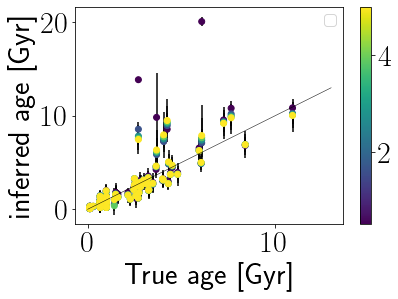

In [37]:
# Plot inferred vs. true age
nvars = len(all_true_ages)
var = abs_kinerrs
for i in range(nvars):
    plt.errorbar(all_true_ages[i], all_pred_ages[i], yerr=all_sigmas[i], fmt="k.", zorder=0)
    plt.scatter(all_true_ages[i], all_pred_ages[i], c=np.ones(len(all_true_ages[i]))*var[i],
                vmin=min(var), vmax=max(var), zorder=1)
xs = np.linspace(0,13, 100)
plt.plot(xs, xs, "k-", lw=.5)
plt.colorbar()
plt.xlabel("True age [Gyr]")
plt.ylabel("inferred age [Gyr]")
plt.legend()

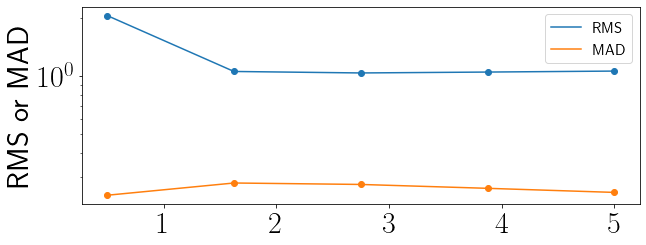

In [41]:
fig = plt.figure(figsize=(10, 8))
ax0 = fig.add_subplot(211)
ax0.plot(abs_kinerrs, rms, "C0o")
ax0.plot(abs_kinerrs, rms, "C0-", label="RMS")
ax0.plot(abs_kinerrs, mad, "C1o")
ax0.plot(abs_kinerrs, mad, "C1-", label="MAD")
ax0.set_ylabel("RMS or MAD")
ax0.set_yscale("log")
ax0.legend()

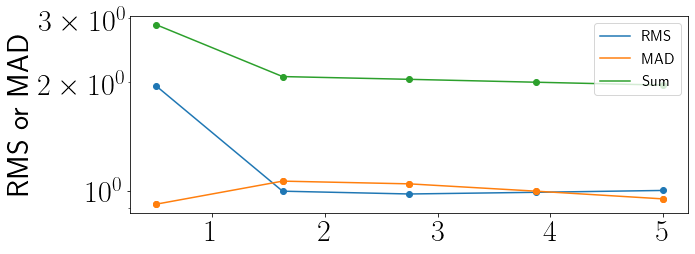

In [52]:
rms_med, mad_med = np.median(rms), np.median(mad)
rms_norm, mad_norm = rms/rms_med, mad/mad_med
sump = rms_norm + mad_norm

fig = plt.figure(figsize=(10, 8))
ax0 = fig.add_subplot(211)
ax0.plot(abs_kinerrs, rms_norm, "C0o")
ax0.plot(abs_kinerrs, rms_norm, "C0-", label="RMS")
ax0.plot(abs_kinerrs, mad_norm, "C1o")
ax0.plot(abs_kinerrs, mad_norm, "C1-", label="MAD")
ax0.plot(abs_kinerrs, mad_norm, "C1o")
ax0.plot(abs_kinerrs, sump, "C2-", label="Sum")
ax0.plot(abs_kinerrs, sump, "C2o")
ax0.set_ylabel("RMS or MAD")
ax0.set_yscale("log")
ax0.legend()

We find that an absolute error of 5 days minimizes the total median-normalized RMS and MAD. 

In [25]:
x2_min = .12

def log_period_model(x2, log_period_break_m, log_period_break_b):
    """
    2nd-order polynomial describing relationship between period and
    age. period = m*logage + b
    """
    return log_period_break_m * (x2 - x2_min) + log_period_break_b

# Mean model
def gyro_mean_model(x1, x2, log_period_break_m, log_period_break_b,
                    teff_break, slope_low, slope_high, smooth):
    """
    Predict the period at given values of color and age.
    Use a smoothed broken power law for the period - color relation.
    Use get_log_period_break for the period - age relation.
    """
    delta = x1 - teff_break
    brk = log_period_model(x2, log_period_break_m, log_period_break_b)  # Get the period at this age
    slope = slope_low / (1 + np.exp(smooth * delta)) \
        + slope_high / (1 + np.exp(-smooth * delta))
    return slope * delta + brk

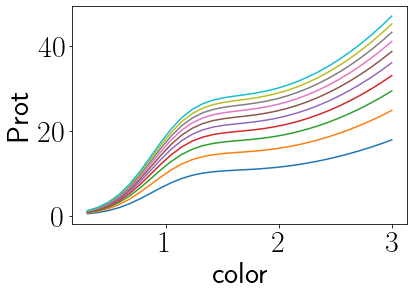

In [28]:
map_soln = results[0][0]
age_plot = np.log(np.linspace(1, 14, 10))
x_plot = np.linspace(.3, 3., 30)

lp = []
for a in age_plot:
    log_p = gyro_mean_model(x_plot, a, map_soln["log_period_break_m"], map_soln["log_period_break_b"],
                            map_soln["teff_break"], map_soln["slope_low"], map_soln["slope_high"],
                            map_soln["log_smooth"])
    plt.plot(x_plot, np.exp(log_p))
#     log_p = log_period_model(a, map_soln["log_period_break_m"], map_soln["log_period_break_b"])
#     lp.append(log_p)
# plt.plot(np.exp(age_plot), np.exp(lp))
plt.xlabel("color")
plt.ylabel("Prot");